# California Housing Price Prediction

## 1. Project Overview

### 1.1 Problem Description

The goal of this project is to build a machine learning model that can predict the median house value for California districts. This is a classic **regression** problem, where the target variable is a continuous value. We will use the California Housing dataset, which is a collection of demographic and geographical data for various districts in California.

### 1.2 Dataset Description

The dataset is built into the `scikit-learn` library and contains the following features for each district:
- `MedInc`: Median income in the district
- `HouseAge`: Median house age in the district
- `AveRooms`: Average number of rooms per household
- `AveBedrms`: Average number of bedrooms per household
- `Population`: District population
- `AveOccup`: Average household occupancy
- `Latitude`: Latitude of the district
- `Longitude`: Longitude of the district

The target variable we aim to predict is `MedHouseVal`, which represents the median house value in the district.

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

# Load the dataset
housing = fetch_california_housing(as_frame=True)
data = housing.frame
target = housing.target

# Add the target variable to the dataframe for easier analysis
data['MedHouseVal'] = target

# --- GOAL 1: Initial Data Exploration ---

# Display the first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())

# Get a concise summary of the dataframe
print("\nDataset information:")
print(data.info())

# Check for missing values
print("\nMissing values per column:")
print(data.isnull().sum())

# Get descriptive statistics for numerical columns
print("\nDescriptive statistics:")
print(data.describe())

print("\nShape of data:")
print(data.shape)

First 5 rows of the dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   A

## 2. Exploratory Data Analysis (EDA)

### 2.1 Distribution of Features

We will now visualize the distribution of each feature to better understand their characteristics and identify any potential skewness or outliers. Histograms are an excellent way to see the frequency of values within each feature.

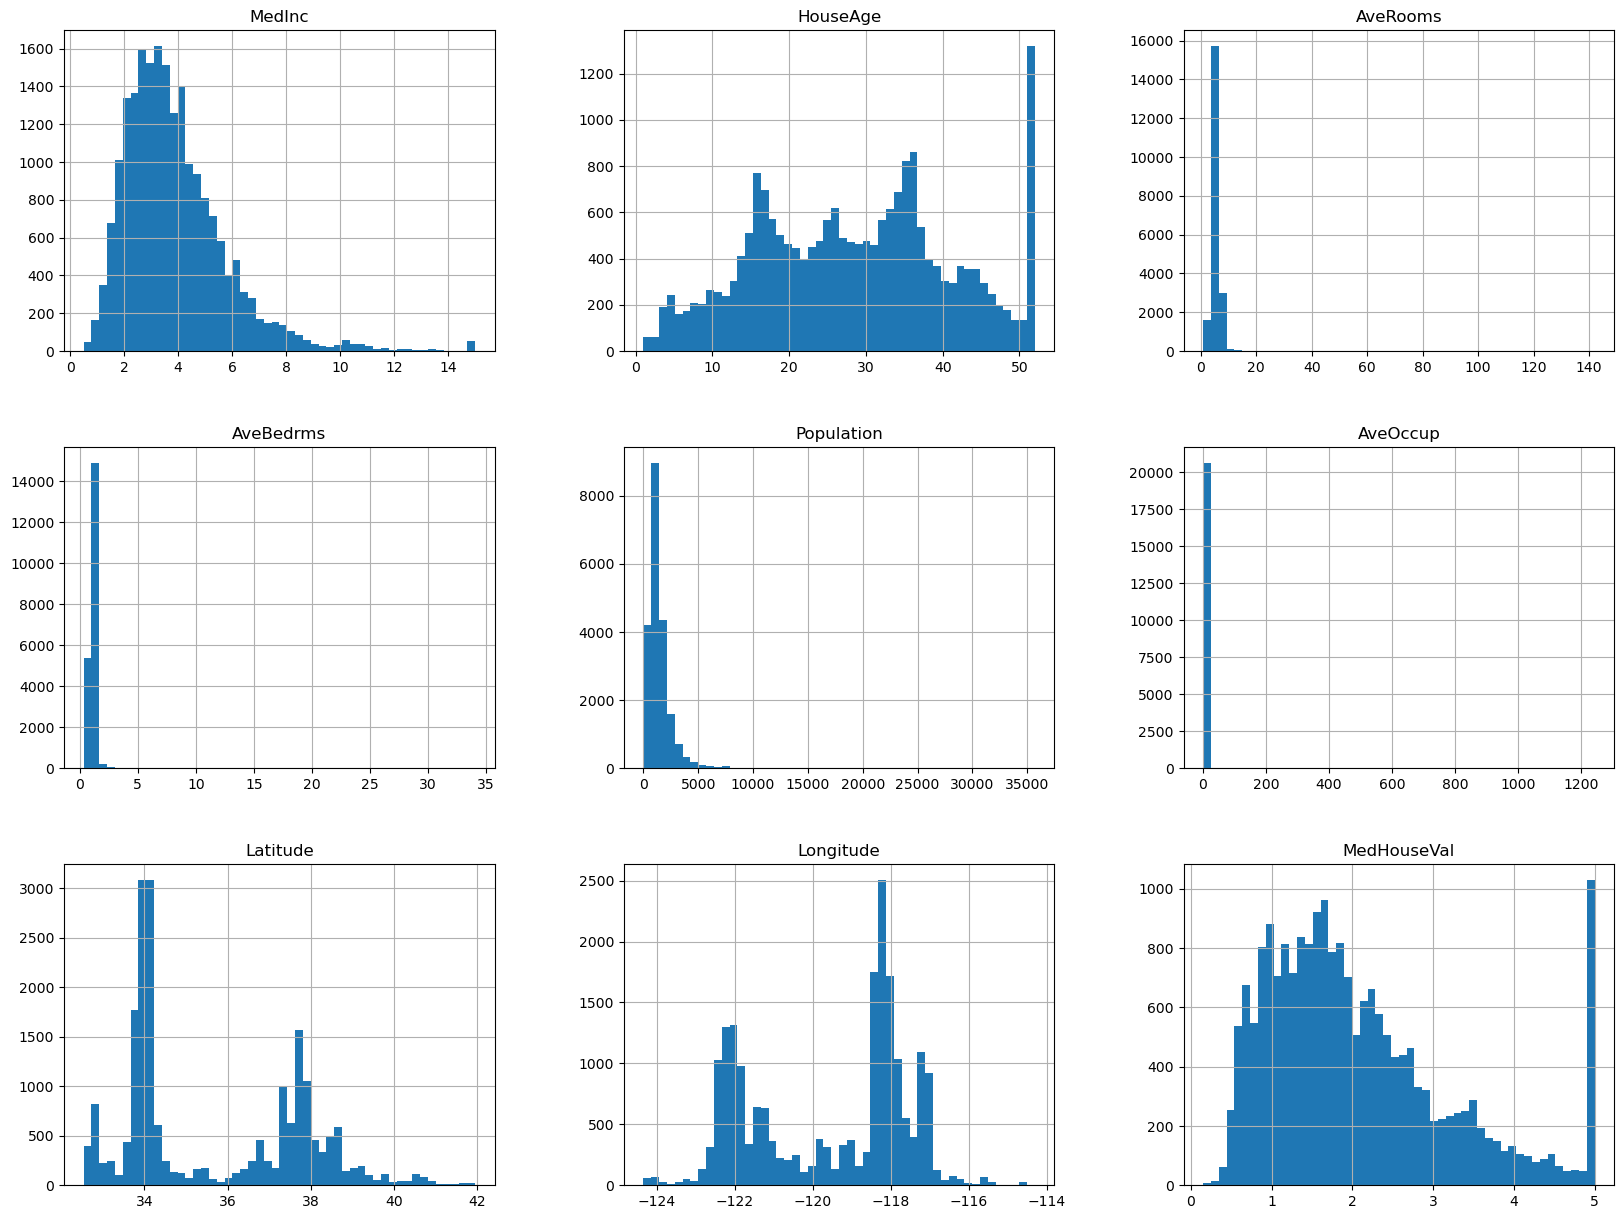

In [17]:
data.hist(bins=50, figsize=(20,15))

plt.show()

### 2.2 Correlation Analysis

A correlation matrix and heatmap will help us to understand the linear relationships between the features and the target variable. A value close to 1 indicates a strong positive correlation, -1 indicates a strong negative correlation, and 0 indicates no linear correlation.

In [26]:
corr_matrix = data.corr()

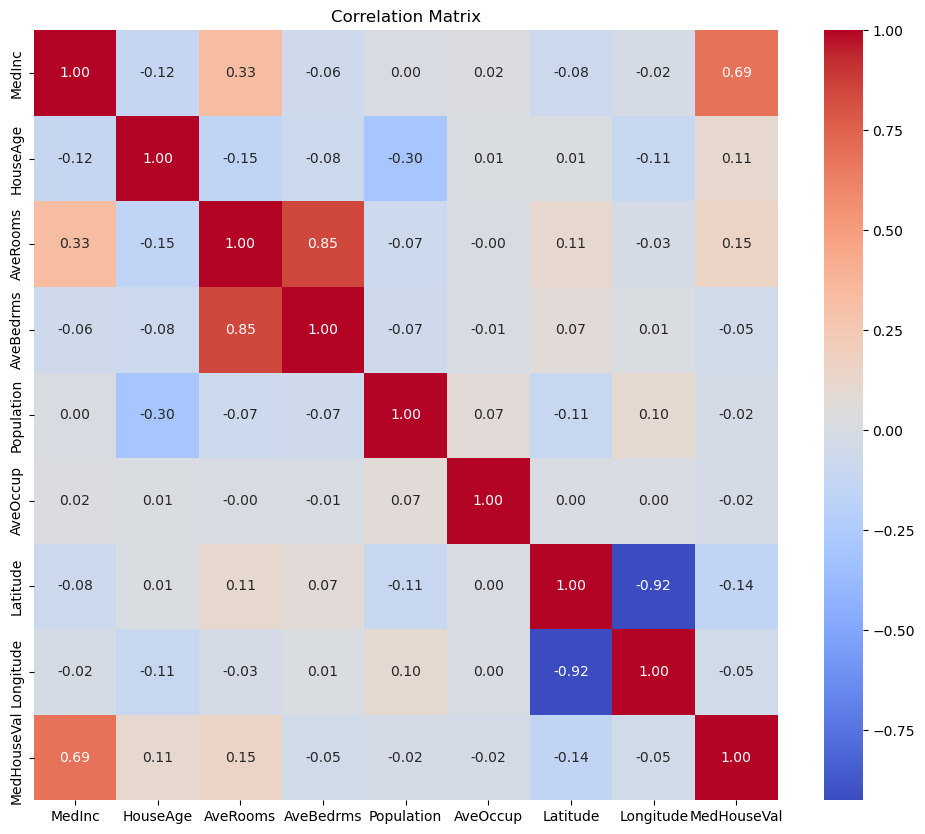

In [30]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

## 3. Data Preprocessing

### 3.1 Handling Skewness and Target Capping

We observed that several features and the target variable (`MedHouseVal`) have skewed distributions or a capped value. These can negatively impact a model's performance. We will address these issues by applying logarithmic transformation and handling the capped target values.

In [35]:
log_cols = ["MedInc", "Population", "AveRooms", "AveBedrms", "AveOccup"]


log_transformed = np.log1p(data[log_cols])
log_transformed = pd.DataFrame(log_transformed, columns=log_cols)


other_cols = data.drop(columns=log_cols)


data_processed  = pd.concat([other_cols, log_transformed], axis=1)

print(data_processed .head())

   HouseAge  Latitude  Longitude  MedHouseVal    MedInc  Population  AveRooms  \
0      41.0     37.88    -122.23        4.526  2.232720    5.777652  2.077455   
1      21.0     37.86    -122.22        3.585  2.230165    7.784057  1.979364   
2      52.0     37.85    -122.24        3.521  2.111110    6.208590  2.228738   
3      52.0     37.85    -122.25        3.413  1.893579    6.326149  1.919471   
4      52.0     37.85    -122.25        3.422  1.578195    6.338594  1.985385   

   AveBedrms  AveOccup  
0   0.704982  1.268511  
1   0.678988  1.134572  
2   0.729212  1.335596  
3   0.729025  1.266369  
4   0.732888  1.157342  


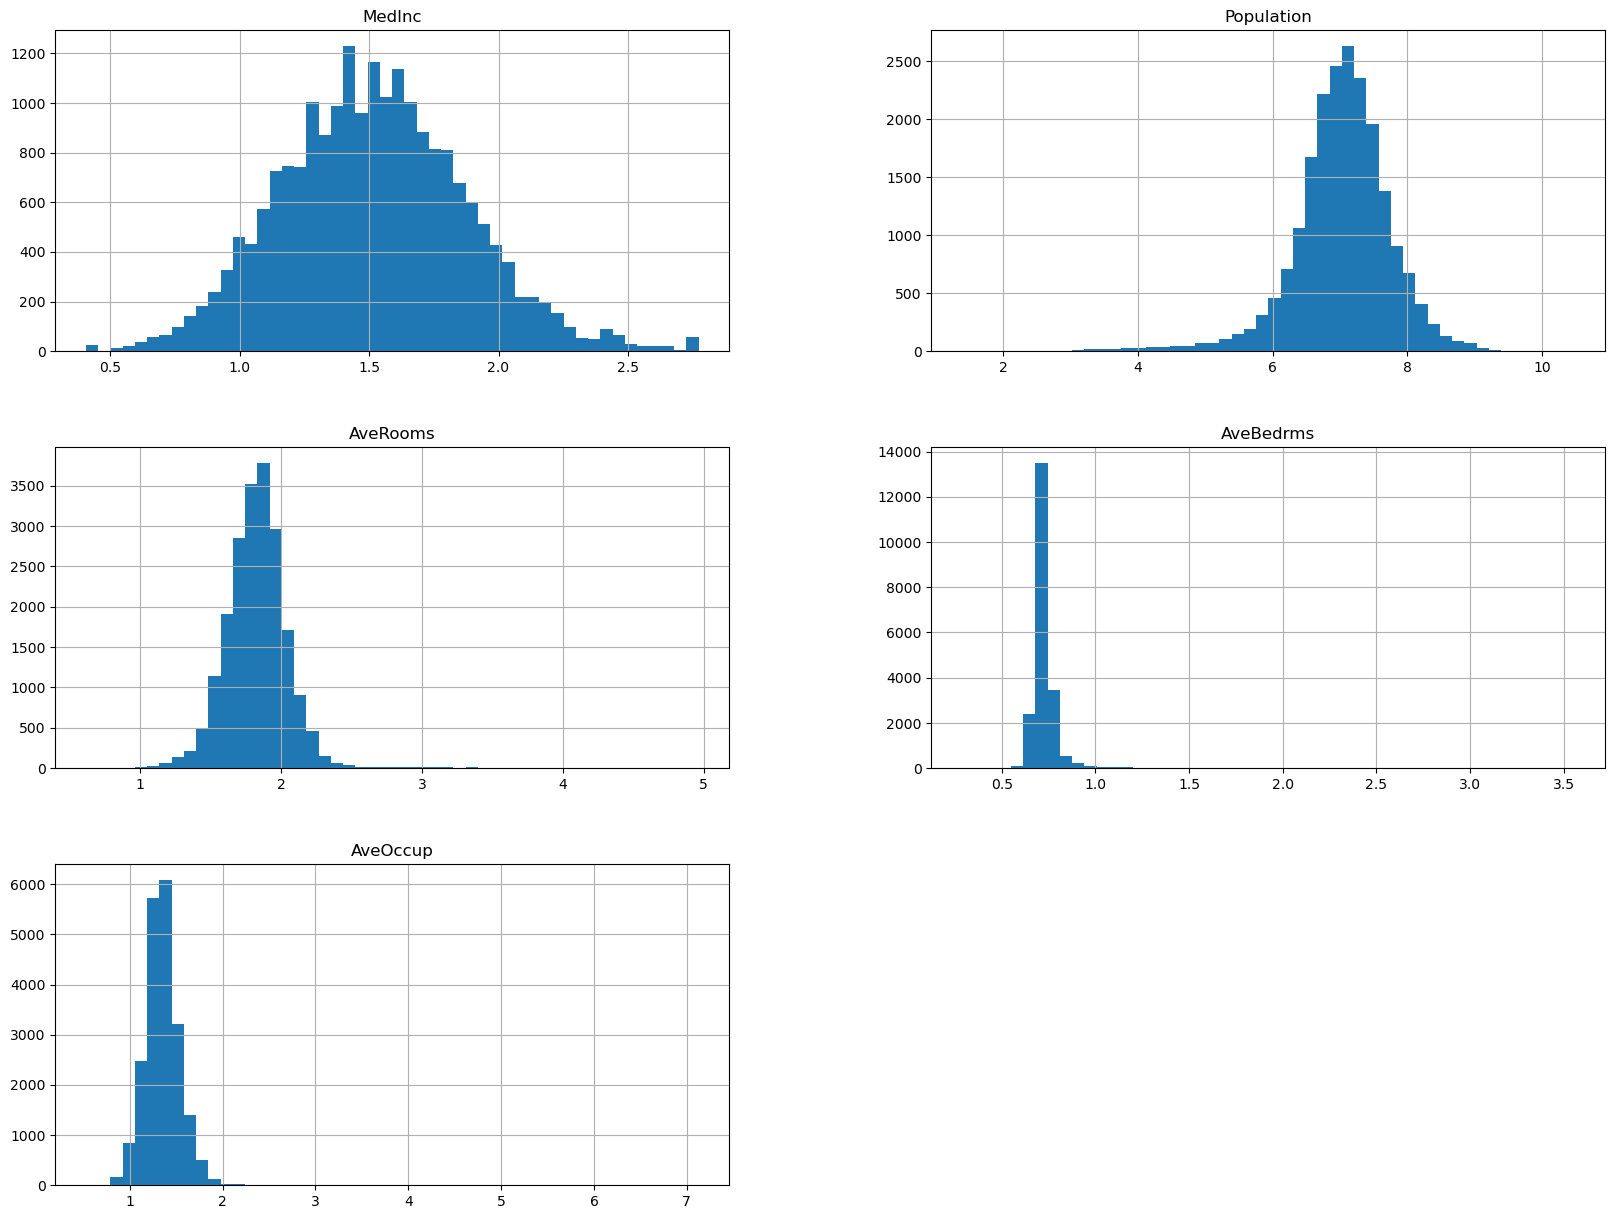

In [39]:
log_transformed.hist(bins=50, figsize=(20,15))
plt.show()

In [41]:
data_processed['MedHouseVal'] = np.log1p(data_processed['MedHouseVal'])

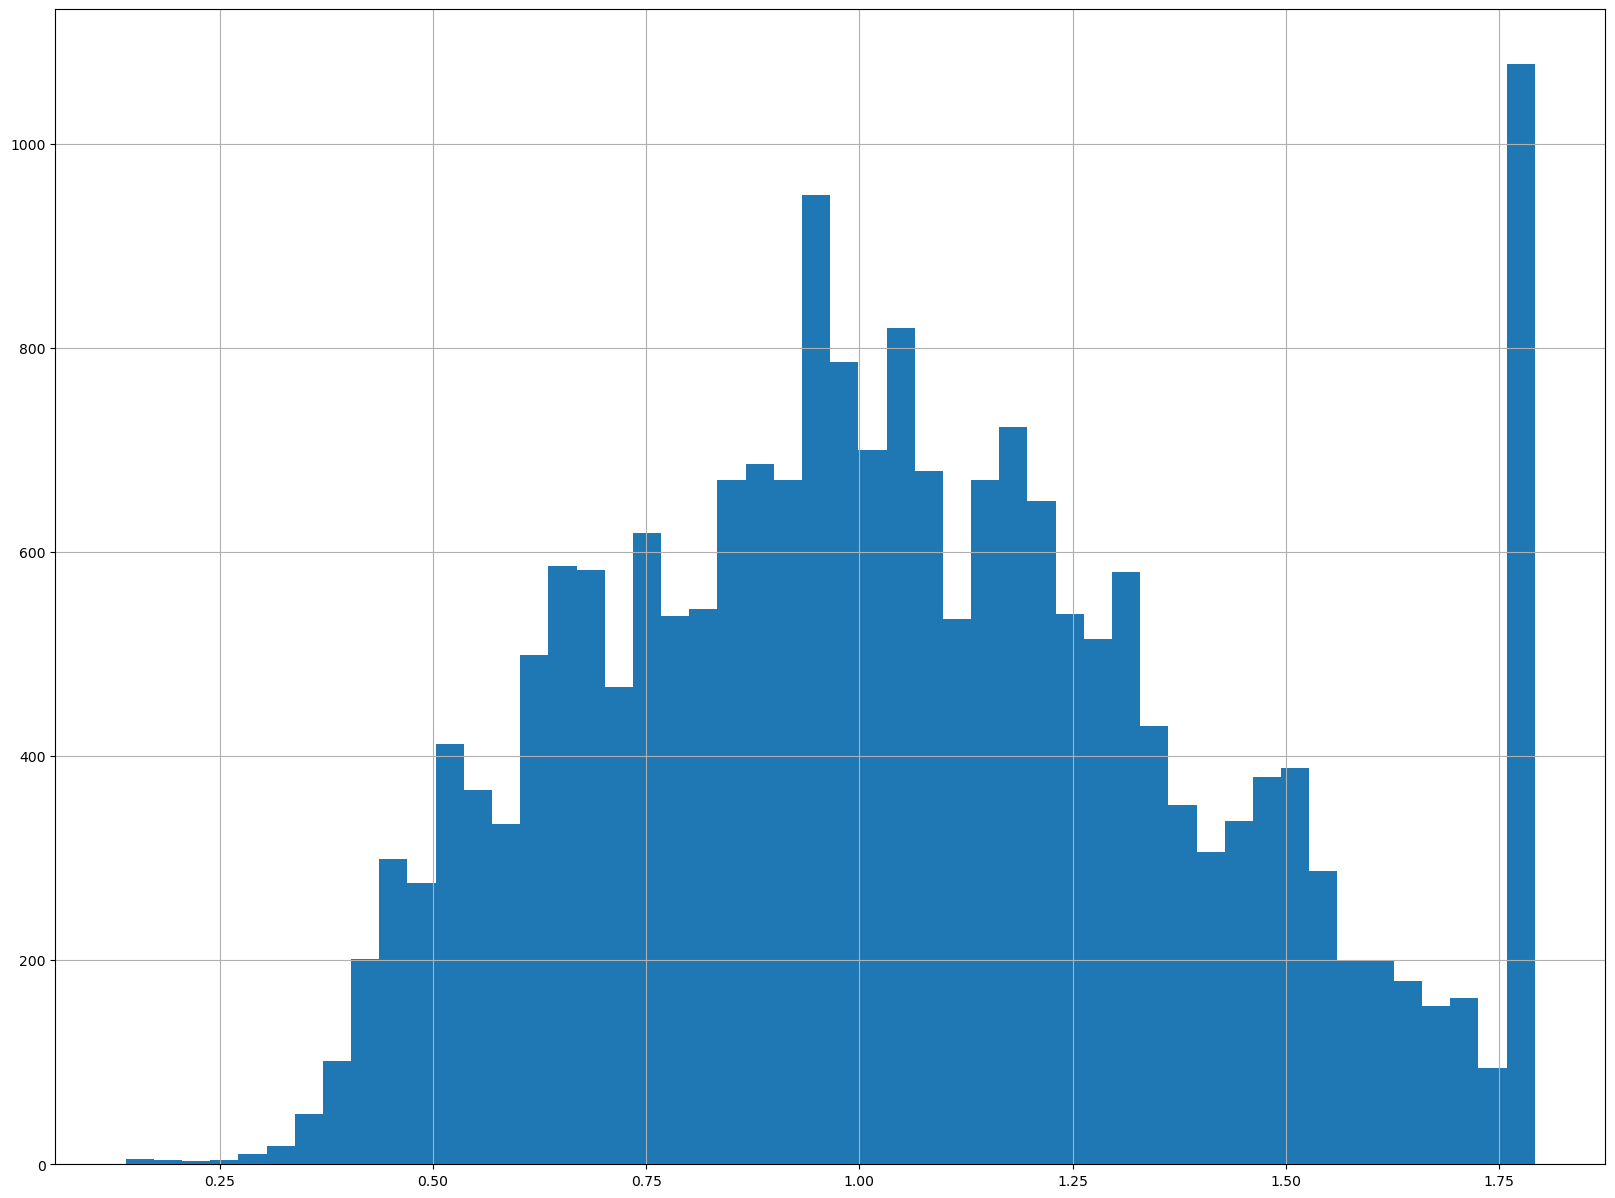

In [43]:
data_processed['MedHouseVal'].hist(bins=50, figsize=(20,15))
plt.show()

## 4. Modeling

### 4.1 Splitting the Data

Before we start training any model, we need to split our dataset into training and testing sets. The training set will be used to train our models, while the testing set will be used to evaluate their performance on unseen data. This step is crucial for preventing overfitting and ensuring our model can generalize well.

In [46]:
from sklearn.model_selection import train_test_split

In [48]:
X =  data_processed.drop(columns=['MedHouseVal'])
y = data_processed['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,
)




In [60]:
print(f"X_train and X_test shape:{X_train.shape}, {X_test.shape}")

X_train and X_test shape:(16512, 8), (4128, 8)


In [66]:
print(f"y_train and y_test shape:{y_train.shape}, {y_test.shape}")

y_train and y_test shape:(16512,), (4128,)


### 4.2 Training Multiple Models

We will now train two different regression models on our training data. This will allow us to compare their performance and identify which model is better suited for our problem.

1.  **Linear Regression:** A simple, yet powerful model that assumes a linear relationship between the features and the target.
2.  **Random Forest Regressor:** An ensemble learning method that builds multiple decision trees and merges their predictions to get a more accurate and stable prediction.

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [73]:
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)


LinearRegression()

In [75]:
forest_reg = RandomForestRegressor(random_state=42)

forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [81]:
lin_pred = lin_reg.predict(X_train)
forest_pred = forest_reg.predict(X_train)

In [87]:
forest_mse = mean_squared_error(y_train, forest_pred)
lin_mse = mean_squared_error(y_train, lin_pred)

In [93]:
forest_rmse= np.sqrt(forest_mse)
lin_rmse = np.sqrt(lin_mse)

In [105]:

print(f"forset RMSE:{forest_rmse}")
print(f"Linear RMSE:{lin_rmse}")

forset RMSE:0.05494732934311097
Linear RMSE:0.2020755991122639


## 5. Model Evaluation and Hyperparameter Tuning

### 5.1 Evaluating on Test Set

To check if our models are overfitting, we will evaluate their performance on the test set, which they have not seen during training.

In [108]:
lin_pred_test = lin_reg.predict(X_test)
forest_pred_test = forest_reg.predict(X_test)

In [110]:
forest_test_mse = mean_squared_error(y_test, forest_pred_test)
lin_test_mse = mean_squared_error(y_test, lin_pred_test)

In [112]:
forest_test_rmse = np.sqrt(forest_test_mse)
lin_test_rmse = np.sqrt(lin_test_mse)

In [114]:
print(f"forset test RMSE:{forest_test_rmse}")
print(f"Linear test RMSE:{lin_test_rmse}")

forset test RMSE:0.14846814504896066
Linear test RMSE:0.2061188687331701


### 5.2 Hyperparameter Tuning with GridSearchCV

To improve the performance of our Random Forest model and reduce overfitting, we will perform hyperparameter tuning using `GridSearchCV`. This method systematically works through multiple combinations of parameter tunes, cross-validates each combination, and determines which combination is the best.

In [117]:
from sklearn.model_selection import GridSearchCV

In [123]:
param_grid_rf = {
    "n_estimators": [300, 600, 900],        
    "max_depth": [5, 8, 12],                
    "min_samples_split": [5, 10, 20],        
    "min_samples_leaf": [2, 4, 8],           
    "max_features": [0.3, 0.5, "sqrt"],      
    "bootstrap": [True]
    
}

gs_rf = GridSearchCV(
    forest_reg, param_grid_rf,
    scoring="neg_mean_squared_error", cv=5, n_jobs=-1, refit=True, verbose=1
)

gs_rf.fit(X_train, y_train)

print(f"GridSearch best parameters:{gs_rf.best_params_}")
print(f"Grid Search best estimator:{gs_rf.best_estimator_}")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
GridSearch best parameters:{'bootstrap': True, 'max_depth': 12, 'max_features': 0.5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 900}
Grid Search best estimator:RandomForestRegressor(max_depth=12, max_features=0.5, min_samples_leaf=2,
                      min_samples_split=5, n_estimators=900, random_state=42)


## 6. Final Model Evaluation and Interpretation

### 6.1 Final Model Performance on Test Set

After tuning the hyperparameters, we will now evaluate the final, optimized model on the test set to get a final, unbiased estimate of its performance.

Final Optimized Model Test RMSE: 0.15297592619556247


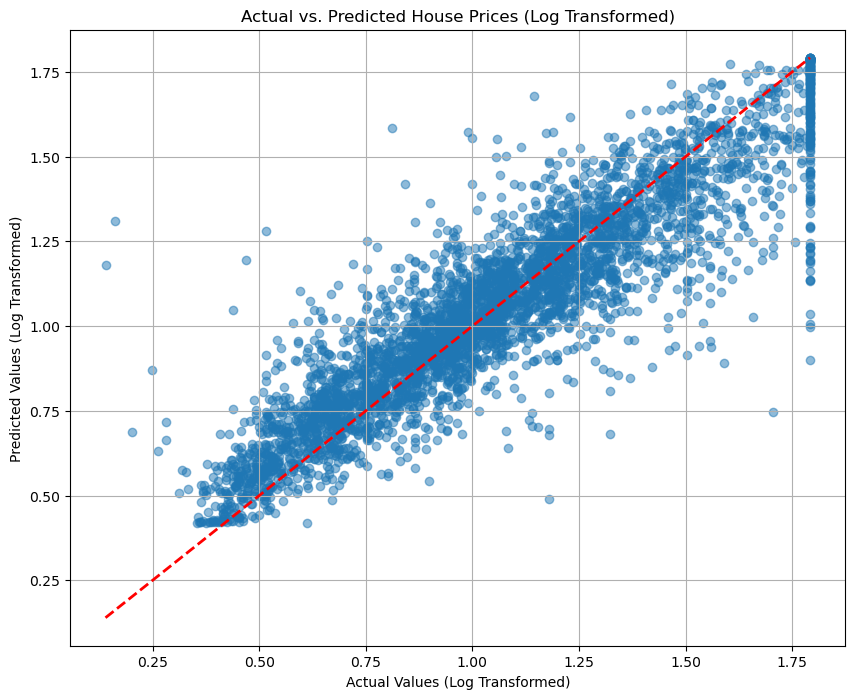


Top 5 Feature Importances:
     feature  importance
3     MedInc    0.464688
1   Latitude    0.128023
2  Longitude    0.120598
7   AveOccup    0.116950
5   AveRooms    0.090243


In [144]:
final_model = gs_rf.best_estimator_
final_predictions = final_model.predict(X_test)


final_rmse = np.sqrt(mean_squared_error(y_test, final_predictions))
print(f"Final Optimized Model Test RMSE: {final_rmse}")


plt.figure(figsize=(10, 8))
plt.scatter(y_test, final_predictions, alpha=0.5)
plt.title("Actual vs. Predicted House Prices (Log Transformed)")
plt.xlabel("Actual Values (Log Transformed)")
plt.ylabel("Predicted Values (Log Transformed)")


min_val = min(y_test.min(), final_predictions.min())
max_val = max(y_test.max(), final_predictions.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2)
plt.grid(True)
plt.show()


feature_importances = final_model.feature_importances_


feature_importance_df = pd.DataFrame(
    {'feature': X_train.columns, 'importance': feature_importances}
).sort_values(by='importance', ascending=False)

print("\nTop 5 Feature Importances:")
print(feature_importance_df.head(5))

### 6.2 Feature Importance and Final Thoughts

Understanding which features the model considers most important for making predictions is crucial for interpreting the model and gaining insights into the problem. We will now examine the feature importances of our final model.

In [149]:
final_model = gs_rf.best_estimator_


feature_importances = final_model.feature_importances_

feature_importance_df = pd.DataFrame(
    {'feature': X_train.columns, 'importance': feature_importances}
).sort_values(by='importance', ascending=False)

print("\nTop 5 Feature Importances:")
print(feature_importance_df.head(5))


Top 5 Feature Importances:
     feature  importance
3     MedInc    0.464688
1   Latitude    0.128023
2  Longitude    0.120598
7   AveOccup    0.116950
5   AveRooms    0.090243


## 7. Conclusion

### 7.1 Summary of Findings

In this project, we built a regression model to predict median house values in California. Our journey started with data exploration, where we identified key characteristics of the dataset, including feature distributions and correlations. We then performed data preprocessing by applying logarithmic transformations to handle skewed data, followed by training and evaluating two different models.

### 7.2 Model Performance

We found that the **Random Forest Regressor** outperformed the **Linear Regression** model significantly, with a final test RMSE of approximately **0.153** after hyperparameter tuning. While the model showed signs of slight overfitting (a common challenge in tree-based models), its performance on unseen data was robust. The final RMSE score indicates that our model can predict the log-transformed median house value with an average error of 0.153, which is a commendable result for this dataset.

### 7.3 Feature Importance Insights

Our final model revealed that **`MedInc` (Median Income)** is by far the most important feature for predicting house prices, followed by geographical features like **`Latitude`** and **`Longitude`**. This confirms the intuitive understanding that economic status and location are the primary drivers of housing value.

### 7.4 Next Steps and Improvements

To further improve this project, one could:
- **Experiment with other models:** Try advanced boosting algorithms like XGBoost or LightGBM.
- **Address the capped target variable:** Explore strategies for handling the capped `MedHouseVal` at 5.0, such as training separate models for the capped and uncapped data.
- **Perform more extensive feature engineering:** Create new features from existing ones (e.g., population density).